# MA124 Maths by Computer: Assignment 4

## Machine Learning Applied to Bike Sharing Demand Data (20 Marks)

---

In a recent research article published in the journal Computer Communications, authors Sathishkumar V E, Jangwoo Park, and Yongyun Cho sought to predict the "bike count required at each hour for the stable supply of rental bikes"[1]. They employed several regression models, including linear regression. The dataset used in the original study is available [here](https://archive.ics.uci.edu/ml/datasets/Seoul+Bike+Sharing+Demand).

**Assignment:** Apply machine learning to a modified version of the original dataset and report the results. 


[1] Sathishkumar V E, Jangwoo Park, and Yongyun Cho. 'Using data mining techniques for bike sharing demand prediction in metropolitan city.' Computer Communications, Vol.153, pp.353-366, March, 2020. [web link](https://doi.org/10.1016/j.comcom.2020.02.007).

---

The original research article and a modified dataset are posted on the Moodle page. You will need to refer to the article for some of the tasks below. You will need to download SeoulBikeData_mod.csv and put it into the folder with your assignment notebook. You do not need to submit SeoulBikeData_mod.csv with your assignment (see below).

SeoulBikeData_mod.csv has been modified from the original dataset to remove the categorical variables, and to convert dates to months. Months have been coded by number, e.g. 1 = January, etc. Only half the months are included in the modified dataset.

---

While the number of tasks is large, this is in part because the instructions are rather specific. Many of them follow directly from the Week 7 and 8 notebooks. 

Computational tasks:

1. Import needed libraries. (You will need pandas, seaborn, as well as things from sklearn, and of course numpy and matplotlib.)

2. Using pandas, read SeoulBikeData_mod.csv into a Dataframe.

3. `describe` the Dataframe. 

4. Plot a histogram of `Rented Bike Count`. Do not plot this as a density, but as a count. See Fig. 3 of the article. The vertical axis in the article is labelled "frequency", but is the same as the count. 

    Produce a box plot similar to that in Fig. 3 of the article.
    
    Try to generate both the histogram and box plot to look approximately as they do in the article.

5. Produce two violin plots: one showing `Rented Bike Count` for different values of the `Month` and the other showing `Rented Bike Count` for different values of the `Hour`.

6. From the full Dataframe, create a new Dataframe `X` containing all the columns except `Rented Bike Count` and a Series `y` containing only the `Rented Bike Count` column. These are your design matrix and target respectively. 

7. Perform a test-train split to create `X_train`, `X_test`, `y_train` and `y_test`. You **must** use the same percentage of data for testing and training as was used in the article and you **must** state what they are. You can find these in the article. 

8. Create and train a linear regression model. 

9. Use the trained model to obtain `y_pred`, the prediction on the test data `X_test`. Form the residual `resid = y_test - y_pred`. 

10. Compute and report: Rsquared (R2), the Root Mean Squared Error (RMSE), the Mean Absolute Error (MAE), and the Coefficient of Variation (CV). Compare these results to those on the top, right of Table 4 of the article. (Note, the modified dataset we are studying is different from that used in the article. Hence the results will not be identical. However, the procedure is very close to that used in the article.)

11. Produce and comment on the following plots.

- Histograms of `y_test` and of `y_pred` (on the same plot). These should be reported as counts rather than densities.

- A scatter plot of `resid` as a function of `y_test` corresponding to Fig. 9 of the article. (Recall what `y_test` represents and label the plot appropriately.) Unlike Fig. 9 of the paper, you should use a colormap to plot the different `Hours` in different colours. 

- A scatter plot of `resid` as a function of `X_test['Month']`. Use a colormap to indicate the absolute value of `resid`.

- A scatter plot of `resid` as a function of `X_test['Rainfall(mm)']`. Use a colormap to indicate the absolute value of `resid`.

    (For all of the scatter plots, feel free to also vary the point size and colours to make attractive and informative plots. Choose a colormap that looks good to you.)
    
12. (Challenge material, 4 of the 20 marks) You will see in the article that most of the results involve "Trees". There are several types of trees used in machine learning. Sklearn provides a [DecisionTreeRegressor](https://scikit-learn.org/stable/modules/tree.html). 
- Create and train a DecisionTreeRegressor with `max_depth=8`. [Here](https://scikit-learn.org/stable/auto_examples/tree/plot_tree_regression.html#sphx-glr-auto-examples-tree-plot-tree-regression-py) is an example that you will want to use. 
- The train model to obtain `y_pred` in this case.
- Compute and report: Rsquared (R2), the Root Mean Squared Error (RMSE), the Mean Absolute Error (MAE), and the Coefficient of Variation (CV). Compare with what is what was obtained from the linear regression model above.
- Plot histograms of of `y_test` and `y_pred` (on the same plot). 


**Short Introduction**
<br>
This article seeks to solve the problem of the constant fluctuation in the number of users of the bike sharing system and they do this by trying to predict the number of rental bikes that were needed to make the bike sharing system consistently work by decreasing/increasing the number of available bikes where necessary. The article takes into account many factors including weather information (Temperature, Humidity, Windspeed, Visibility, Dewpoint, Solar radiation, Snowfall, Rainfall), day/time, seasons, day of the week and a few more. They examine the efficiency of various regression models including (a) Linear Regression, (b) Gradient Boosting Machine, (c) Support Vector Machine and a few more by produce their corresponding performance measures to compare them objectively. Overall this article uses a very thorough approach and could be a good read for those with knowlege of the statistics used.


In [1]:
# Import libraries

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
import seaborn as sns

In [2]:
bike = pd.read_csv("SeoulBikeData_mod.csv")
bike.describe()

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Month
count,4416.000000,4416.00000,4416.000000,4416.000000,4416.000000,4416.000000,4416.000000,4416.000000,4416.000000,4416.000000,4416.000000
mean,704.591259,11.50000,13.203986,59.257246,1.653193,1398.641304,4.723958,0.560181,0.139312,0.070879,5.956522
std,637.407244,6.92297,11.529724,20.162981,0.976361,621.560536,12.671445,0.860496,1.145271,0.437416,3.407262
min,0.000000,0.00000,-17.800000,0.000000,0.000000,27.000000,-30.600000,0.000000,0.000000,0.000000,1.000000
25%,189.000000,5.75000,4.500000,44.000000,0.900000,853.000000,-3.500000,0.000000,0.000000,0.000000,3.000000
50%,542.000000,11.50000,14.300000,58.000000,1.500000,1621.000000,6.400000,0.010000,0.000000,0.000000,5.000000
75%,1047.000000,17.25000,22.200000,75.000000,2.200000,1999.000000,14.900000,0.910000,0.000000,0.000000,9.000000
max,3298.000000,23.00000,38.000000,98.000000,6.700000,2000.000000,26.800000,3.520000,35.000000,8.800000,11.000000


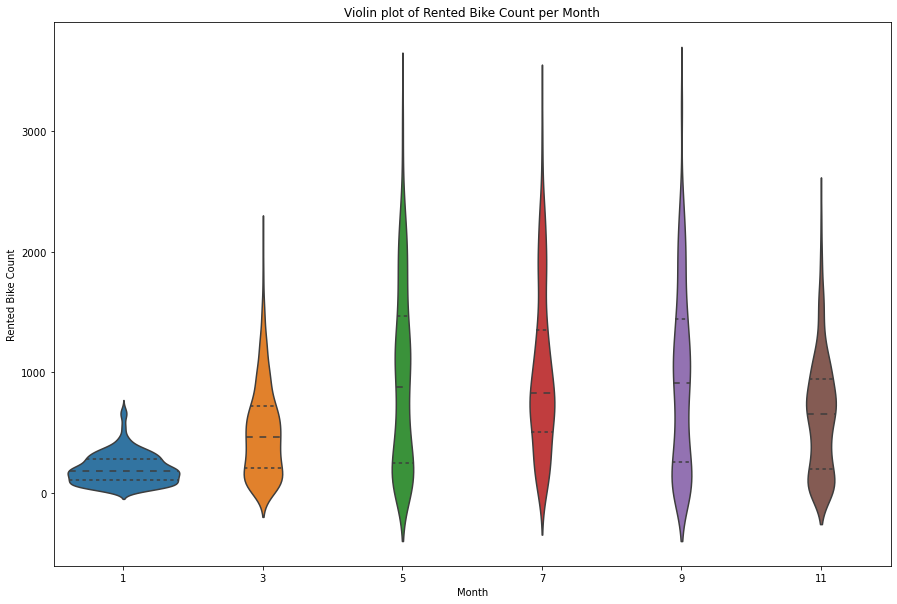

In [3]:
# In this cell I plot a violin plot of Rented Bike Count for different values of the Month
plt.figure(figsize = (15, 10))
sns.violinplot(x='Month', y='Rented Bike Count', data=bike, inner = 'quartile')
plt.title('Violin plot of Rented Bike Count per Month')
plt.show()

The above violin plot shows that the average Rented Bike Count increases until the month of June and decreases after the month of June. So that the maximum average Rented Bike Count occurs in the month of June.

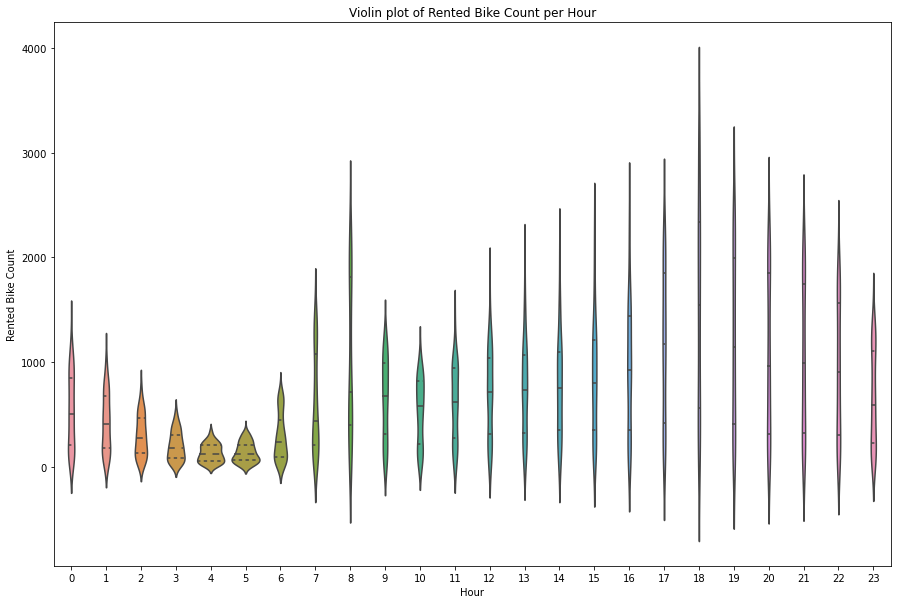

In [4]:
# In this cell I plot a violin plot of Rented Bike Count for different values of the Hour
plt.figure(figsize = (15, 10))
sns.violinplot(x='Hour', y='Rented Bike Count', data=bike, inner = 'quartile')
plt.title('Violin plot of Rented Bike Count per Hour')
plt.show()

The above violin plot shows that the average Rented Bike Count decreases in until the 5th hour of the day, So that the minimum average Rented Bike Count occurs in the 5th hour of the day. The average Rented Bike Count then increases until the 18th hour of the day. So that the maximum average Rented Bike Count occurs in the 18th hour of the day and decreases thereafter for the rest of the day.

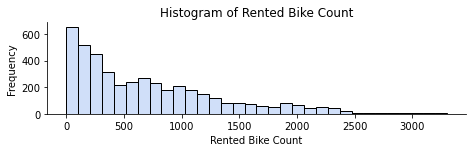

In [5]:
# In this cell I plot a histogram of Rented Bike Count using counts rather than densities.
hist = sns.displot(bike['Rented Bike Count'], height = 2, aspect=10/3, color = "cornflowerblue", alpha = 0.3)
plt.ylabel('Frequency')
plt.title('Histogram of Rented Bike Count')
plt.show()

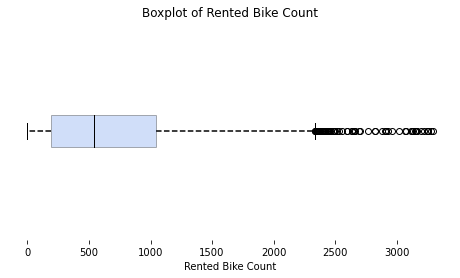

In [6]:
# In this cell I plot a boxplot similar to that in Fig. 3 of the article.
medianprops = dict(linestyle='-', linewidth=1, color='k')
whiskerprops = dict(linestyle='--', linewidth=1.5)
boxprops=dict(facecolor="cornflowerblue", alpha = 0.3)
bp = bike.boxplot('Rented Bike Count', vert=False, patch_artist=True, grid=False, figsize=(8, 4), boxprops=boxprops, whiskerprops=whiskerprops, medianprops = medianprops)
plt.tick_params(labelleft=False, left=False)
bp.set_frame_on(False)
plt.title('Boxplot of Rented Bike Count')
plt.xlabel('Rented Bike Count')
plt.show()

In [7]:
# Create a new DataFrame X containing all the columns except Rented Bike Count
# Create a new Series y containing only the Rented Bike Count column.
X = bike.drop(['Rented Bike Count'], axis=1)
y = bike['Rented Bike Count']

In [8]:
# Create a train-test split with a test size of 20% of the total samples and train size of 75% of the total samples
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, train_size=0.75)

# Create # Create linear regression object object
regr = linear_model.LinearRegression()

# Train the model using the train data
regr.fit(X_train, y_train)

# Use the model to predict the test data
y_pred = regr.predict(X_test)

# Form the residual
resid = y_test - y_pred

In [9]:
print("Using linear regression... ")

# Root mean squared error (RMSE)
RMSE = np.sqrt(np.mean(resid**2))
print("The root mean squared error is:", RMSE)

# Mean absolute error (MAE)
MAE = np.mean(np.abs(resid))
print("The mean absolute error is:", MAE)

# Coefficient of variation (CV)
CV = 100 * RMSE/np.mean(y_test)
print("The coefficient of variation (as a rounded percentage) is: {}{}".format(round(CV),"%"))

# R squared ( 𝑅2 )
r2 = r2_score(y_test, y_pred)
print("R squared is:", r2)

Using linear regression... 
The root mean squared error is: 464.71414819786804
The mean absolute error is: 340.56058820442297
The coefficient of variation (as a rounded percentage) is: 67%
R squared is: 0.4809903684336383


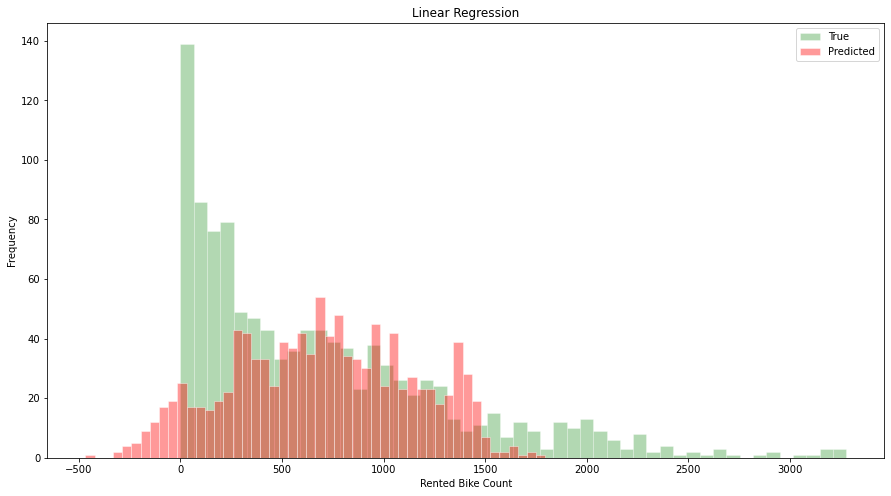

In [10]:
# In this cell I plot histograms of y_test and of y_pred (on the same plot), using counts rather than densities.
plt.figure(figsize = (15, 8))
plt.hist(y_test, bins = 50, label = 'True', alpha = 0.3, color = 'green', ec='white')
plt.hist(y_pred, bins = 50, label = 'Predicted', alpha = 0.4, color = 'red', ec='white')
plt.title('Linear Regression')
plt.xlabel('Rented Bike Count')
plt.ylabel('Frequency')
plt.legend()
plt.show()

The histogram plot above shows that the predicted set of data using linear regression is not as accurate as the true set of data and this can be seen through the negative values that the predicted set produces and the lack of frequency in the predicted set compared to the true set of data. [i.e the bars are not as high in the predicted set of data compared to the true set of data.] If all these negative data points were shifted to the zero position, perhaps the predicted data would look a lot more like the original graph.

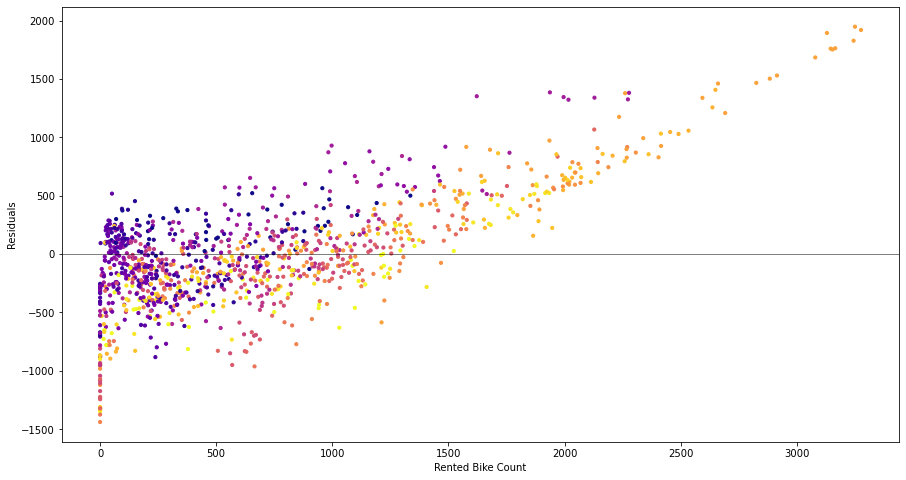

In [11]:
# In this cell I plot a scatter plot of resid as a function of y_test
# Using a colormap to plot the different Hours in different colours.
plt.figure(figsize = (15, 8))
plt.scatter(y_test, resid, c = X_test['Hour'], cmap = 'plasma', s = 10)
plt.xlabel('Rented Bike Count')
plt.ylabel('Residuals')
plt.axhline(color='k', lw = 0.5)
plt.show()

The above scatter plot shows that there is an increase in the number of bikes rented in the early hours of the day and another increase in the number of bikes rented in the evening.  ['The peak hours']

It also shows that the relationship between the variables considered in the rented bike count is not very well represented by the linear regression model as the residuals are also not well dispersed around the horizontal axis.

Overall, it seems like the machine struggled at predicting the later months as they are a lot more spread out.

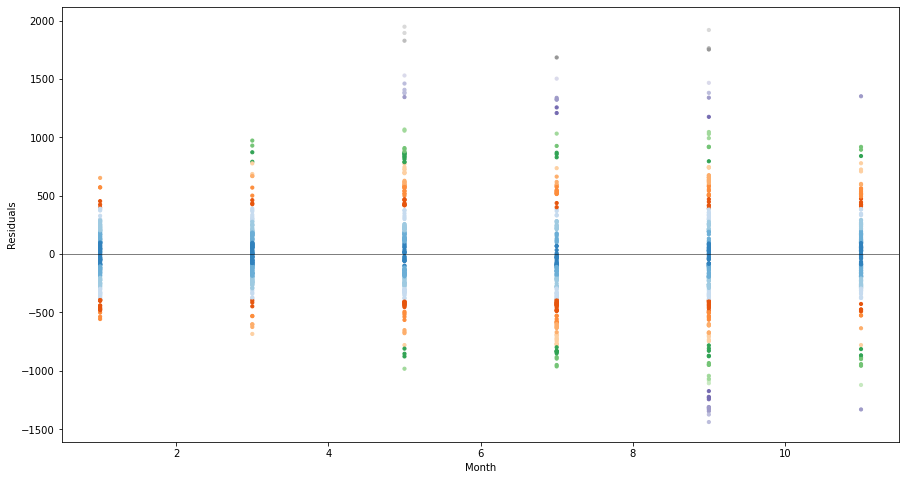

In [12]:
# In this cell I plot A scatter plot of resid as a function of X_test['Month']
# Using a colormap to indicate the absolute value of resid.
plt.figure(figsize = (15, 8))
plt.scatter(X_test['Month'], resid, c = np.abs(resid), cmap = 'tab20c', s = 10)
plt.xlabel('Month')
plt.ylabel('Residuals')
plt.axhline(color='k', lw = 0.5)
plt.show()

The above scatter plot shows that there is a greater number of average bikes being rented over the first few months.
There is less error in the earlier months, probably due to the less data points available.
There is a lot of error in the later months like May and June probably due to the wider use of bicycles in these months.

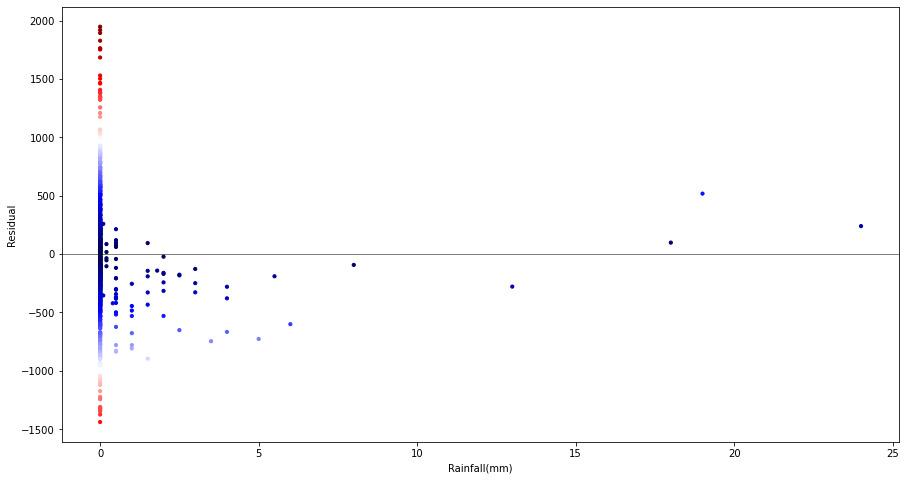

In [13]:
# In this cell I plot A scatter plot of resid as a function of X_test['Rainfall(mm)']
# Using a colormap to indicate the absolute value of resid.
plt.figure(figsize = (15, 8))
plt.scatter(X_test['Rainfall(mm)'], resid, c = np.abs(resid), cmap = 'seismic', s = 10)
plt.xlabel('Rainfall(mm)')
plt.ylabel('Residual')
plt.axhline(color='k', lw = 0.5)
plt.show()

The above scatter plot shows that the Rented Bike Count decreases as the Rainfall increases.

---

## Further 5 marks

A further 5 marks will be awarded for this assignment based on overall quality and clarity of the submitted notebook. Clearly this assignment lends itself to producing a nice document. Such a document might be useful to you in the future, for example in applying for internships. 

In [14]:
# Import the necessary modules and libraries
from sklearn.tree import DecisionTreeRegressor

# Create a train-test split with a test size of 20% of the total samples and train size of 75% of the total samples
X_train_tree, X_test_tree, y_train_tree, y_test_tree = train_test_split(X, y, test_size = 0.25, train_size = 0.75)

# Create decision tree regressor object
regr_tree = DecisionTreeRegressor(max_depth=8)

# Train the model using the train data
regr_tree.fit(X_train_tree, y_train_tree)

# Use the model to predict the test data
y_pred_tree = regr_tree.predict(X_test_tree)

# Form the residual
resid_tree = y_test_tree - y_pred_tree

print("Using decision tree regression...")

# Root mean squared error (RMSE)
RMSE = np.sqrt(np.mean(resid_tree**2))
print("The root mean squared error (RMSE) is:", RMSE)

# Mean absolute error (MAE)
MAE = np.mean(np.abs(resid_tree))
print("The mean absolute error (MAE) is:", MAE)

# Coefficient of variation (CV)
CV = 100 * np.sqrt(np.mean(resid_tree**2))/np.mean(y_test_tree)
print("The coefficient of variation (as a rounded percentage) is: {}{}".format(round(CV),"%"))

# R squared ( 𝑅2 )
r2 = 1 - np.sum((y_test_tree-y_pred_tree)**2)/np.sum((y_test_tree-np.mean(y_test_tree))**2)
print("R squared is:", r2)

Using decision tree regression...
The root mean squared error (RMSE) is: 377.3698698810894
The mean absolute error (MAE) is: 231.89910252849677
The coefficient of variation (as a rounded percentage) is: 53%
R squared is: 0.652061552549549


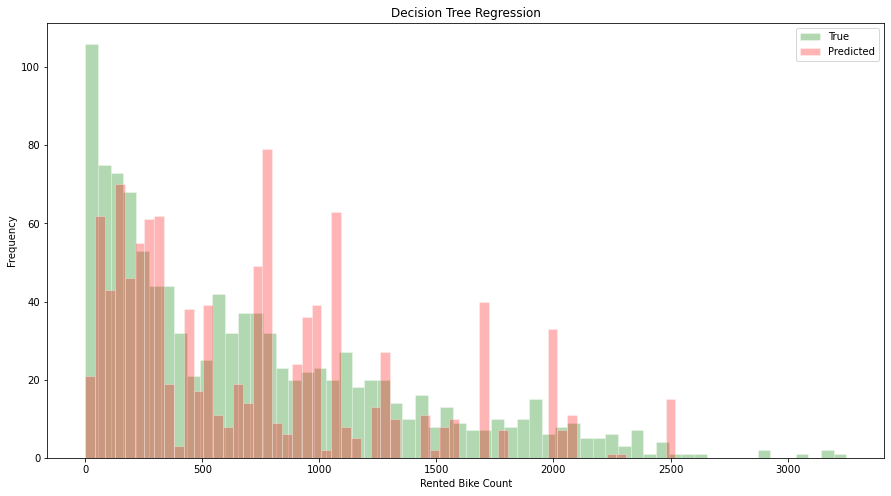

In [15]:
# In this cell I plot histograms of y_test and of y_pred (on the same plot), using counts rather than densities.
plt.figure(figsize = (15, 8))
plt.hist(y_test_tree, bins = 60, label = 'True', alpha = 0.3, color = 'green', ec = 'white')
plt.hist(y_pred_tree, bins = 60, label = 'Predicted', alpha = 0.29, color = 'red', ec = 'white')
plt.title('Decision Tree Regression')
plt.xlabel('Rented Bike Count')
plt.ylabel('Frequency')
plt.legend()
plt.show()

The histogram plot above clearly shows that the predicted set produced using decision tree regression is a much better fit for the data compared to the predicted set produced using linear regression and this is clear from the shape of the bars that  predicted set produced where the shape is a much closer fit to the true data and the fact that there are no negative values further backs the claim.

However, this doesn't take away from the fact that the predicted data is still not that accurate as can be seen from the histogram [i.e the frequency is too high where it shouldn't be at places]

**Ending summary of the results**:
The performance measures produced using the Decision Tree Regression proves to be a much better fit for the data because:
1) The RMSE, MAE, CV produced using Decision Tree Regression are less than that which were produced using linear regression.
2) The $R^{2}$ (R squared) value produced using Decision Tree Regression is greater than that which was produced using linear regression.


The values are copied below for reference

Using linear regression... 
<br>
The root mean squared error is: 464.71414819786804
<br>
The mean absolute error is: 340.56058820442297
<br>
The coefficient of variation (as a rounded percentage) is: 67%
<br>
R squared is: 0.4809903684336383
<br>


Using decision tree regression...
<br>
The root mean squared error (RMSE) is: 377.3698698810894
<br>
The mean absolute error (MAE) is: 231.89910252849677
<br>
The coefficient of variation (as a rounded percentage) is: 53%
<br>
R squared is: 0.652061552549549
<br>

***...With connection back to original research article***
<br>
In the end, the performance measures produced using the **linear regression model** are not too far off from from those that were published in the article
For example: **These  values are from the article Table 4 in Fig. 8.**


<br>
Our root mean squared error is: 464.71414819786804
<br>
$Their$ root mean squared error is: 431.72
<br>
Our mean absolute error is: 340.56058820442297
<br>
$Their$ mean absolute error is: 321.84
<br>
Our coefficient of variation is: 67%
<br>
$Their$ coefficient of variation is: 61.15
<br>
Our $R^{2}$ is: 0.4809903684336383
<br>
$Their$ $R^{2}$ is: 0.55







**Citation**
<br>
[1] Sathishkumar V E, Jangwoo Park, and Yongyun Cho. 'Using data mining techniques for bike sharing demand prediction in metropolitan city.' Computer Communications, Vol.153, pp.353-366, March, 2020. [web link](https://doi.org/10.1016/j.comcom.2020.02.007).

---

## Submission

**You should not submit the SeoulBikeData_mod.csv file**. You will submit **one Jupyter notebook**. 

- The last thing you should do before submitting the notebooks is to Restart Kernel and Run All Cells. You should then save the notebooks and submit the .ipynb files. **You will lose one mark if you submit notebooks that have not been run.**

- No template will be provided, but you should be able to create your own notebook based on this assignment sheet and past submissions.

- If the notebook is run and all code cells are collapsed, the notebook should be readable as a well-formatted report, primarily consisting of:
    - A short introduction making reference to the original research article. (Approximately 50-100 words might be appropriate for this assignment. Restate from the Abstract or Introduction what the article is about. Obviously you won't understand all the details, but in a few words you should be able to summarise the motivation and goals.)
    - Computational tasks. Descriptions of these can be brief (from one to a few sentences, enough for the reader to follow without looking at the code.)
    - Properly labelled figures. There should be a short description of each (this is very important).
    - Ending summary of the results making connection back to the original research article, for example by comparing your results to those in the article. 
    - Somewhere in the report a full citation to the research article should appear. Use this assignment sheet as a model. 

Use the example notebooks as a guide for Python style. One assumes the reader understands Python. Add comments to set off blocks of code or to note anything tricky. In most cases Python code explains itself.

---